In [1]:
#Import Packages

import cv2
import numpy as np
import MTM
from MTM import matchTemplates, drawBoxesOnRGB
import matplotlib.pyplot as plt
import pandas as pd
from skimage import color
from skimage import io
from scipy import ndimage, misc

In [2]:
#Import and Format Pictures

ColorImg = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Aww yikes/12-55-28.jpg')
#SampleImg = cv2.cvtColor(ColorImg, cv2.COLOR_BGR2GRAY)
SampleImg = cv2.cvtColor(ColorImg, cv2.COLOR_BGR2GRAY)

In [3]:
#Import and Format Templates

Template1Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker1.jpg')
Template1 = cv2.cvtColor(Template1Color, cv2.COLOR_BGR2GRAY)

Template2Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker2.jpg')
Template2 = cv2.cvtColor(Template2Color, cv2.COLOR_BGR2GRAY)

Template3Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker3.jpg')
Template3 = cv2.cvtColor(Template3Color, cv2.COLOR_BGR2GRAY)

Template4Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker4.jpg')
Template4 = cv2.cvtColor(Template4Color, cv2.COLOR_BGR2GRAY)

Template5Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker5.jpg')
Template5 = cv2.cvtColor(Template5Color, cv2.COLOR_BGR2GRAY)

Template6Color = cv2.imread('C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Markers/RealMarker6.jpg')
Template6 = cv2.cvtColor(Template6Color, cv2.COLOR_BGR2GRAY)


listTemplates = [("T1", Template1), ("T2", Template2), 
                ("T3", Template3), ("T4", Template4), 
                ("T5", Template5), ("T6", Template6)
                ]

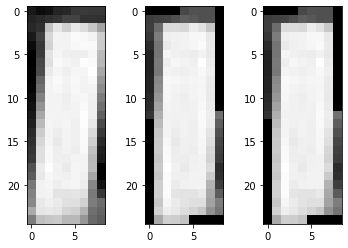

In [4]:
#Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Template1, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated1 = np.rot90(Template1, k=i+1) # NB: np.rotate not good here, turns into float!
    listTemplates.append( (str(angle), rotated1 ) )
    axarr[i+1].imshow(rotated1, cmap="gray")
    
for i,angle in enumerate([2,5]):
    rotated2 = ndimage.rotate(Template1, 2, reshape=False) # NB: np.rotate not good here, turns into float!
    listTemplates.append( (str(angle), rotated2 ) )
    axarr[i+1].imshow(rotated2, cmap="gray")
    
    # We could also do some flipping with np.fliplr, flipud

In [5]:
Hits = matchTemplates(
    listTemplates,
    SampleImg,
    method=cv2.TM_CCOEFF_NORMED,
    score_threshold=0.89,
    maxOverlap=0,
)

print("Found {} hits".format( len(Hits.index) ) )
Hits
    #Is it becuase the images are not floated?

Found 5 hits


,TemplateName,BBox,Score
0,T6,"(175, 288, 10, 25)",0.999825
1,T4,"(368, 253, 22, 13)",0.999777
2,T3,"(271, 224, 10, 25)",0.999613
3,T1,"(183, 222, 9, 25)",0.999606
4,T5,"(268, 290, 12, 25)",0.999573


<IPython.core.display.Javascript object>


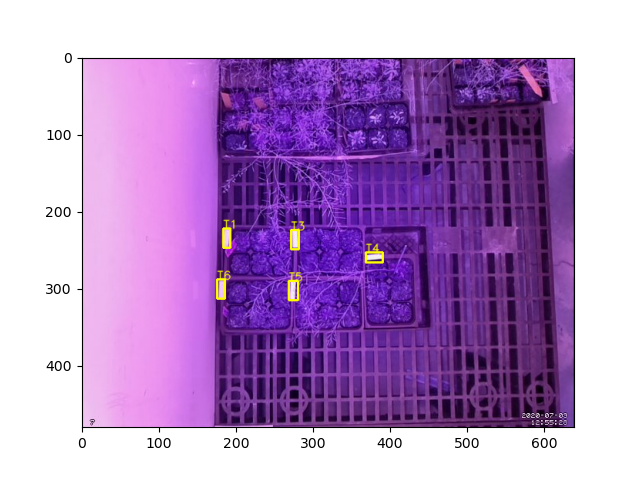

In [6]:
#Show Image with Template Lables

%matplotlib notebook
Overlay = drawBoxesOnRGB(ColorImg, Hits, showLabel=True)
plt.imshow(Overlay)

In [7]:
#Print Results to Excel Spread Sheet

PrintBerg = pd.DataFrame(Hits)
print(PrintBerg)
try:
    PrintBerg.to_excel(r'C:/Users/Beth/Desktop/PrintBerg.xlsx', index = False, header = True)
except:
    print("ERROR: Could Not Print")

  TemplateName                BBox     Score
0           T6  (175, 288, 10, 25)  0.999825
1           T4  (368, 253, 22, 13)  0.999777
2           T3  (271, 224, 10, 25)  0.999613
3           T1   (183, 222, 9, 25)  0.999606
4           T5  (268, 290, 12, 25)  0.999573
